2602160750 - Bryan Orville Audric - GSLC Session 17

#Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.stats import pearsonr
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#Loading Dataset

In [2]:
Data = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Dataset.csv')

In [3]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Visualization

In [4]:
Data.shape

(10000, 14)

In [5]:
Data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Before Visualizing the data, I will be dropping unnecessary columns like CustomerId, Surname, and Geography

In [7]:
Data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Labeling Non Numeric Value into Numeric Value

In [8]:
Encoder = LabelEncoder()

Data['Gender'] = Encoder.fit_transform(Data['Gender'])
Data['Geography'] = Encoder.fit_transform(Data['Geography'])

In [9]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

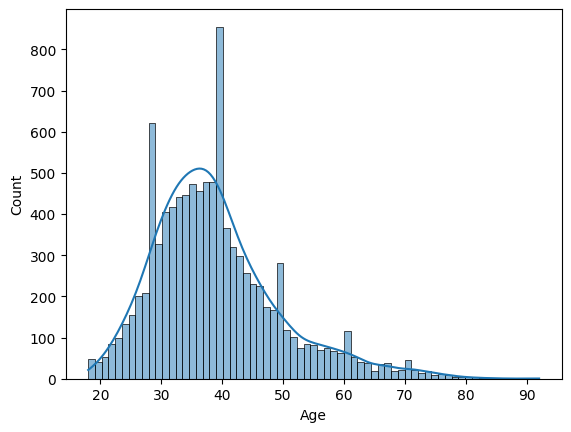

In [10]:
sns.histplot(data=Data['Age'],kde=True)

Box plot of Age

<Axes: ylabel='Age'>

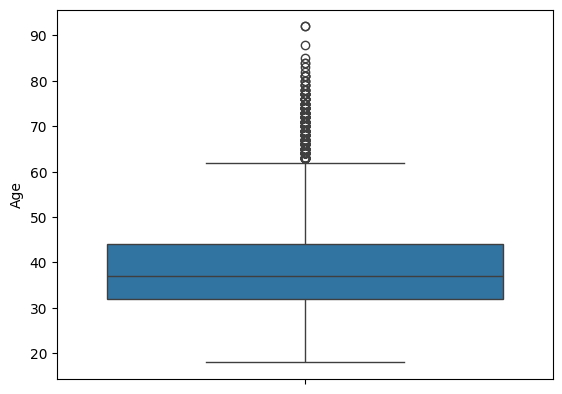

In [11]:
sns.boxplot(data=Data['Age'])

Credit Score Distribution

<Axes: xlabel='CreditScore', ylabel='Count'>

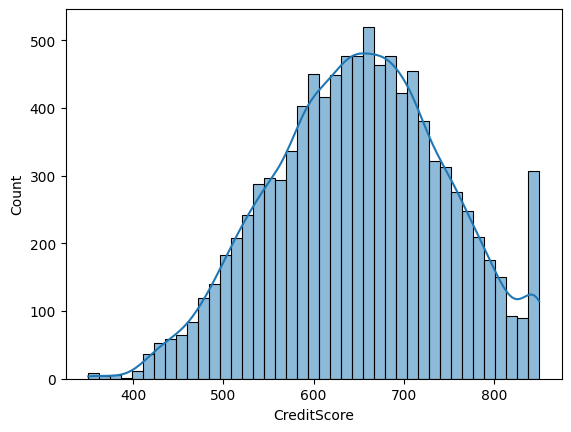

In [12]:
sns.histplot(data=Data['CreditScore'],kde=True)

Box plot of Credit Score

<Axes: ylabel='CreditScore'>

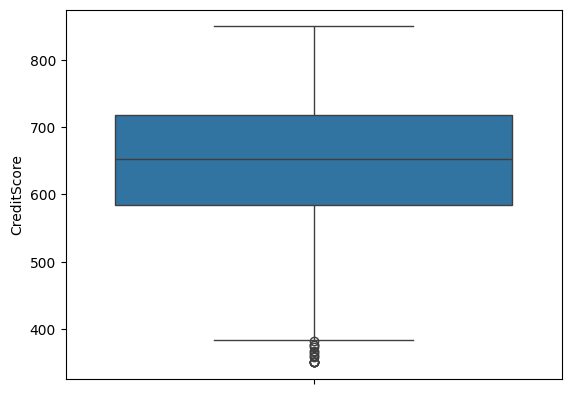

In [13]:
sns.boxplot(data=Data['CreditScore'])

<Axes: ylabel='Balance'>

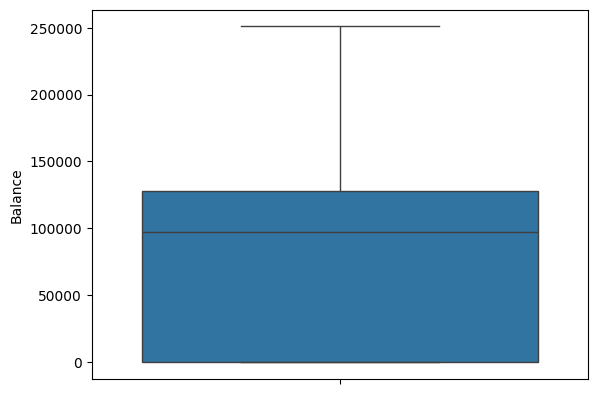

In [14]:
sns.boxplot(data=Data['Balance'])

Box plot of Balance

<Axes: ylabel='Balance'>

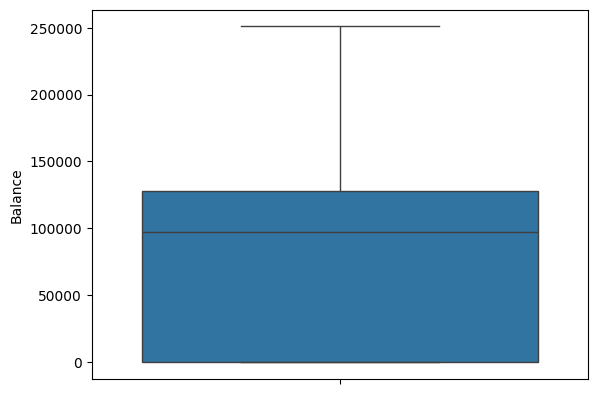

In [15]:
sns.boxplot(data=Data['Balance'])

Box plot of Estimated Salary

<Axes: ylabel='EstimatedSalary'>

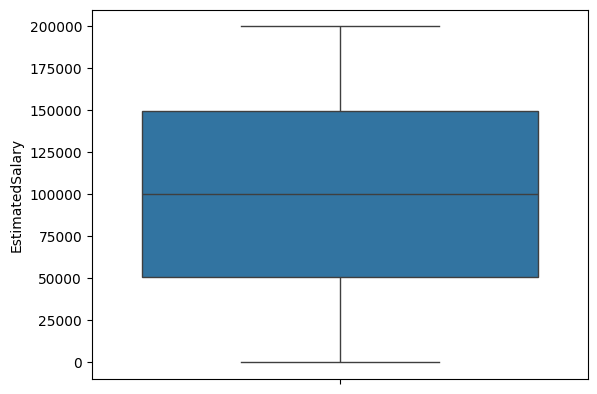

In [16]:
sns.boxplot(data=Data['EstimatedSalary'])

Correlation Map of Dataset

<Axes: >

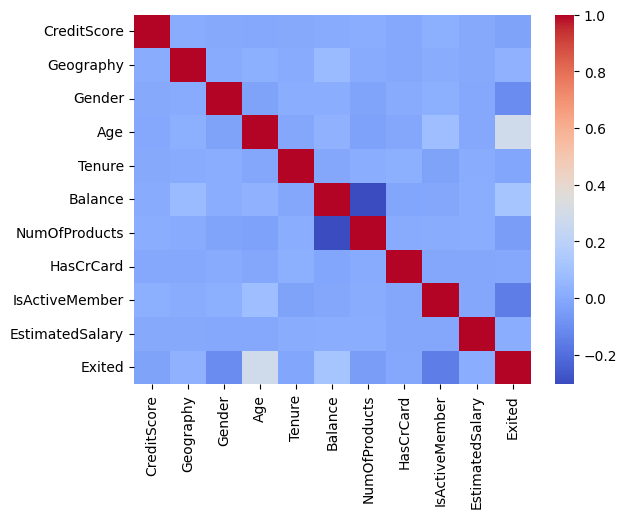

In [17]:
sns.heatmap(data=Data.corr(),cmap='coolwarm')

#Preprocessing

Check for missing value

In [18]:
Data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

List of Features

In [19]:
copydf = Data.copy()
copydf.drop(columns=['Exited'],inplace=True)
print(list(copydf.columns))

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


Feature Selection using Pearson Correlation. Correlation_coefficient threshold is set to 0.1 and the p_value threshold is set to 0.05

In [20]:
selected_features = []

for feature in list(copydf.columns):
  correlation_coefficient,p_value = pearsonr(copydf[feature],Data['Exited'])
  if abs(correlation_coefficient)>0.1 and p_value < 0.05:
    selected_features.append(feature)

This will be the strong features that will be used for training and testing processes

In [21]:
selected_features

['Gender', 'Age', 'Balance', 'IsActiveMember']

In [22]:
selected_features.append('Exited')
Data = Data[selected_features]

In [23]:
Data.head()

,Gender,Age,Balance,IsActiveMember,Exited
0,0,42,0.00,1,1
1,0,41,83807.86,1,0
2,0,42,159660.80,0,1
3,0,39,0.00,0,0
4,0,43,125510.82,1,0


Removing Outlier from Age Data

Before removing outlier

In [24]:
Data.shape

(10000, 5)

In [25]:
Q1 = Data['Age'].quantile(0.25)
Q3 = Data['Age'].quantile(0.75)

IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(Data['Age']<=Lower)[0]
Upper_array = np.where(Data['Age']>=Upper)[0]

Data.drop(index=Lower_array,inplace=True)
Data = Data.reset_index(drop=True)
Data.drop(index=Upper_array,inplace=True)

Data = Data.reset_index(drop=True)

After removing outlier

In [26]:
Data.shape

(9589, 5)

Checking for imbalance in dataset

In [27]:
Data['Exited'].value_counts()

Exited
0    7646
1    1943
Name: count, dtype: int64

Balancing the dataset using Random Under Sampling method

In [28]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(random_state=42)
x = Data.drop(columns=['Exited'])
y = Data['Exited']

x_resampled,y_resampled = RUS.fit_resample(x,y)

Data = pd.concat([x_resampled, y_resampled], axis=1, join='inner')

In [29]:
Data['Exited'].value_counts()

Exited
0    1943
1    1943
Name: count, dtype: int64

Standardizing Age and Balance

In [30]:
copydf = Data.copy()
Scaler = StandardScaler()
copydf = Scaler.fit_transform(copydf)
copydf = pd.DataFrame(copydf,columns=[selected_features])

In [31]:
Data['Age'] = copydf['Age']
Data['Balance'] = copydf['Balance']

In [32]:
Data.head()

,Gender,Age,Balance,IsActiveMember,Exited
0,1,-0.871907,-1.325314,0,0
1,1,-0.435631,0.485219,1,0
2,1,-0.762838,0.271803,0,0
3,1,0.436922,0.484024,0,0
4,0,0.000646,0.254481,0,0


Splitting Dataset into training set and test set 70:30

In [33]:
x = Data.drop(columns=['Exited'])
y = Data['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

#Linear SVM

In [34]:
from sklearn.svm import SVC
LinearSVC_sklearn = SVC(kernel='linear', gamma=1/2, C = 10)
LinearSVC_sklearn.fit(x_train,y_train)
LinearSVC_sklearn_pred = LinearSVC_sklearn.predict(x_test)

In [35]:
print(classification_report(y_test,LinearSVC_sklearn_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       486
           1       0.73      0.71      0.72       486

    accuracy                           0.73       972
   macro avg       0.73      0.73      0.73       972
weighted avg       0.73      0.73      0.73       972



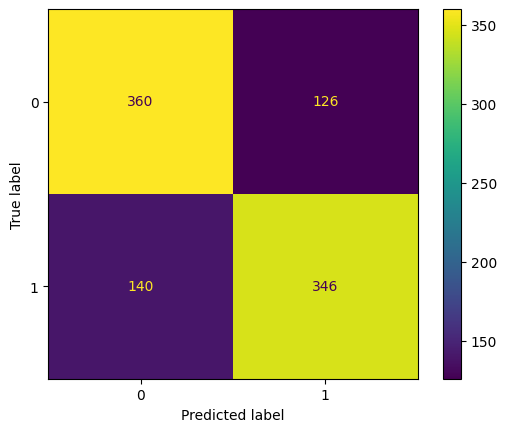

In [36]:
Display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,LinearSVC_sklearn_pred))
Display.plot()

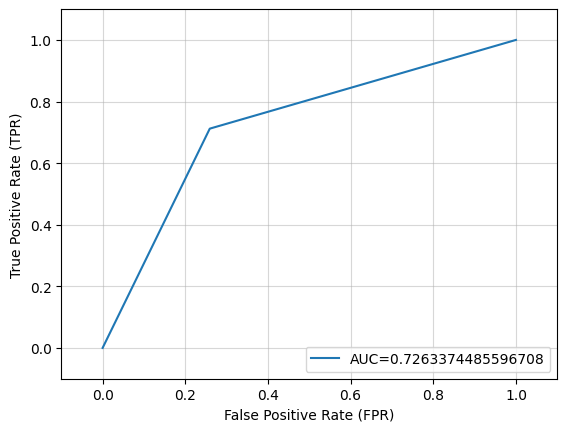

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,_ = roc_curve(y_test,LinearSVC_sklearn_pred)
auc = roc_auc_score(y_test,LinearSVC_sklearn_pred)

plt.plot(fpr,tpr,label='AUC='+str(auc))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

#Non Linear SVM from sklearn

In [37]:
from sklearn.svm import SVC
NonLinearSVC_sklearn = SVC(kernel='rbf', C=10, gamma=1/2, shrinking=False)
NonLinearSVC_sklearn.fit(x_train,y_train)
NonLinearSVC_sklearn_pred = NonLinearSVC_sklearn.predict(x_test)

In [38]:
print(classification_report(y_test,NonLinearSVC_sklearn_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       486
           1       0.74      0.71      0.72       486

    accuracy                           0.73       972
   macro avg       0.73      0.73      0.73       972
weighted avg       0.73      0.73      0.73       972



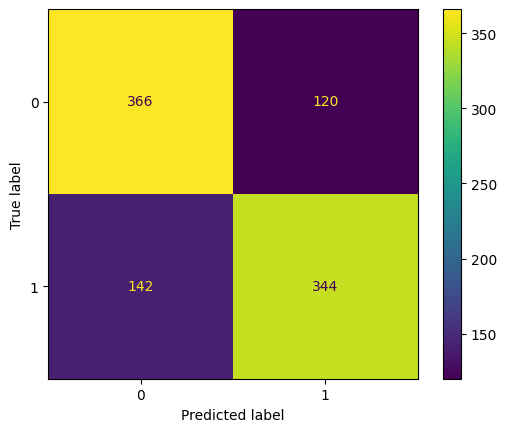

In [39]:
Display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,NonLinearSVC_sklearn_pred))
Display.plot()

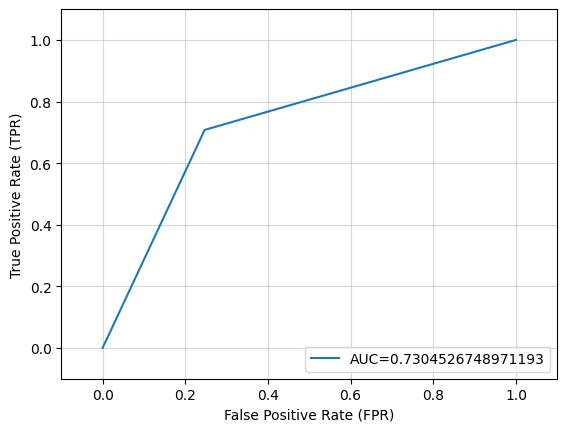

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,_ = roc_curve(y_test,NonLinearSVC_sklearn_pred)
auc = roc_auc_score(y_test,NonLinearSVC_sklearn_pred)

plt.plot(fpr,tpr,label='AUC='+str(auc))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

#Insights

There are no differences in accuracy result from NonLinear and Linear of SVM approaches as it tops at 73%. However, there seems to be a siginificantly small difference in recall, f1 score and precision between two approaches but it doesnt matter as the differences is relatively small